In [59]:
from pylab import*
%run "inte.ipynb"
%matplotlib inline

Hay que resolver $$\frac{d^2 \vec{\rho}}{d \tau ^2}=-\frac{\hat{\rho}}{\rho^2}$$

In [60]:
def mov_planeta(x,t):
    r3 = (x[0]**2 + x[1]**2)**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array([drx,dry,dvrx,dvry])

def J_mov_planeta(x,t):
    d_ec = array([0,0,0,0])
    r5 = (x[0]**2 + x[1]**2)**(2.5)
    rxmry = (2*x[0]*x[0] - x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1] - x[0]*x[0])/r5
    rxry = (3*x[0]*x[1])/r5
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])
    return d_ec,Jac

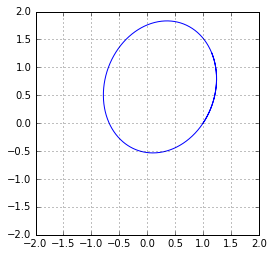

In [61]:
t,r_vr = integra2(mov_planeta,J_mov_planeta,[1,0,.6,.9],[0,10],0.01)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1])
show()

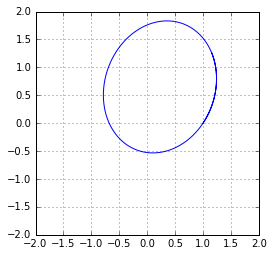

In [62]:
t,r_vr = rk2(mov_planeta,[1,0,.6,.9],[0,10],0.01)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1])
show()

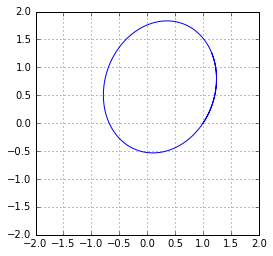

In [63]:
t,r_vr = rk4(mov_planeta,[1,0,.6,.9],[0,10],0.01)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1])
show()

In [72]:
from scipy.integrate import *

In [73]:
h=0.1
tiempos = arange(0,10+h,h)

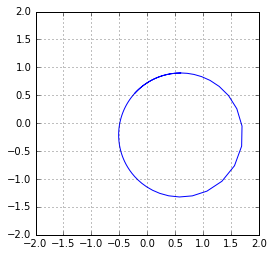

CPU times: user 384 ms, sys: 0 ns, total: 384 ms
Wall time: 382 ms


In [77]:
%%time
r_vr=odeint(mov_planeta,[1,0,.6,.9],tiempos)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,2],r_vr[:,3])
show()